In [1]:
### Install the biopython package 
! pip install biopython
import Bio

#load in modules
import pandas as pd
import urllib as ul
import numpy as np
import matplotlib.pyplot as plt
import pylab

Defaulting to user installation because normal site-packages is not writeable


In [2]:
#Part One Task 1 - Plot a bar chart of the number of genes in each SFARI gene-score category.
#download the SFARI gene list from https://gene.sfari.org/database/human-gene/
ul.request.urlretrieve('https://gene.sfari.org//wp-content/themes/sfari-gene/utilities/download-csv.php?api-endpoint=genes','SFARI-Gene_genes_09-02-2021release_11-27-2021export.csv')
#read the SFARI gene list files into Pandas data frames
SFARI= pd.read_csv('SFARI-Gene_genes_09-02-2021release_11-27-2021export.csv',header=0)
#show the first few lines of the dataframe
SFARI.head()

,status,gene-symbol,gene-name,ensembl-id,chromosome,genetic-category,gene-score,syndromic,number-of-reports
0,9,ABAT,4-aminobutyrate aminotransferase,ENSG00000183044,16,"Rare Single Gene Mutation, Genetic Association",3.0,0,5
1,9,ABCA10,"ATP-binding cassette, sub-family A (ABC1), mem...",ENSG00000154263,17,Rare Single Gene Mutation,3.0,0,1
2,9,ABCA13,ATP binding cassette subfamily A member 13,ENSG00000179869,7,"Rare Single Gene Mutation, Functional",3.0,0,6
3,9,ABCA7,"ATP-binding cassette, sub-family A (ABC1), mem...",ENSG00000064687,19,Rare Single Gene Mutation,3.0,0,4
4,9,ACE,angiotensin I converting enzyme,ENSG00000159640,17,"Rare Single Gene Mutation, Genetic Association",3.0,0,3


<AxesSubplot:xlabel='gene socre', ylabel='gene count'>

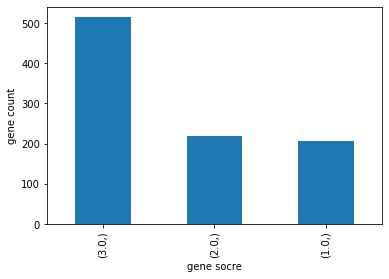

In [3]:
#counts of genes per gene score
SFARI_gene_count_score = pd.DataFrame(SFARI.value_counts(['gene-score']),columns=['gene_number'],)
#make a histogram to show the result
SFARI_gene_count_score.plot.bar(ylabel='gene count', xlabel='gene socre',legend=False)

In [4]:
#Part One Task 2 - Rank the genes by ‘number-of-reports’ and find the top 5 SFARI genes that are in gene-score category 1.
#find the SFARI which gene-score category is 1
SFARI_gene_score_category_1=SFARI[SFARI['gene-score']== 1.0]
#rank the genes by ‘number-of-reports’
SFARI_gene_score_category_1_sorted = SFARI_gene_score_category_1.sort_values(by='number-of-reports', ascending=False)
#show the result
SFARI_gene_score_category_1_sorted.head(6)

,status,gene-symbol,gene-name,ensembl-id,chromosome,genetic-category,gene-score,syndromic,number-of-reports
596,9,NRXN1,neurexin 1,ENSG00000179915,2,"Rare Single Gene Mutation, Syndromic, Genetic ...",1.0,0,94
812,9,SHANK3,SH3 and multiple ankyrin repeat domains 3,ENSG00000251322,22,"Rare Single Gene Mutation, Syndromic, Genetic ...",1.0,1,92
510,9,MECP2,Methyl CpG binding protein 2,ENSG00000169057,X,"Rare Single Gene Mutation, Syndromic, Functional",1.0,1,90
789,9,SCN2A,"sodium channel, voltage-gated, type II, alpha ...",ENSG00000136531,2,"Rare Single Gene Mutation, Syndromic",1.0,0,75
780,9,SCN1A,"sodium channel, voltage-gated, type I, alpha s...",ENSG00000144285,2,"Rare Single Gene Mutation, Syndromic, Genetic ...",1.0,1,68
159,9,CHD8,chromodomain helicase DNA binding protein 8,ENSG00000100888,14,"Rare Single Gene Mutation, Syndromic, Functional",1.0,1,66


In [5]:
#list the top 5 gene-symbol
top_5_gene_symbol=SFARI_gene_score_category_1_sorted['gene-symbol'][0:5]
top_5_gene_symbol

596     NRXN1
812    SHANK3
510     MECP2
789     SCN2A
780     SCN1A
Name: gene-symbol, dtype: object

In [6]:
#Part One Task 3 - For each of these genes find the number of papers in PubMed that include the gene AND are related to Autism.
from Bio import Entrez
# You should replace this with your e-mail address 
Entrez.email = "s2170612@ed.ac.uk" 
# note the egquery function provides Entrez database counts from a global search.
for i in top_5_gene_symbol:
    handle = Entrez.egquery(term='"Autism Spectrum Disorder"'+'[MH]'+ i )
    record = Entrez.read(handle)
    handle.close()
    # we can iterate through the record and only return the 'nucleotide' result
    for row in record["eGQueryResult"]:
        if row["DbName"]=="pubmed":
            print("gene-symbol:" + i +'\n'+ row["Count"]+' papers\n ' )

gene-symbol:NRXN1
75 papers
 
gene-symbol:SHANK3
194 papers
 
gene-symbol:MECP2
147 papers
 
gene-symbol:SCN2A
44 papers
 
gene-symbol:SCN1A
22 papers
 


In [7]:
#Part One Task 4 - From these data fill a table with genes as rows and paper count by year as column.
#search the number of papers in PubMed that include the gene AND are related to Autism by different year
count=[]
for i in range(1999,2022,1):
    for j in top_5_gene_symbol:
        handle = Entrez.egquery(term='"Autism Spectrum Disorder"'+'[MH]'+str(i)+'[dp]' + j)
        record = Entrez.read(handle)
        handle.close()
        for row in record["eGQueryResult"]:
            if row["DbName"]=="pubmed":
                count.append(int(row["Count"]))                

In [8]:
#fill a table with genes as rows and paper count by year as column 
number=int(len(count))/5
chart={}
for k in range(1,int(number)+1,1):
    obj=count[5*k-5:5*k]
    chart[int(k)+1998]=obj
plot = pd.DataFrame(chart,index=top_5_gene_symbol) 
plot

,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
gene-symbol,,,,,,,,,,,,,,,,,,,,,
NRXN1,0,0,0,0,0,0,0,0,4,5,...,6,9,7,5,3,7,7,13,6,7
SHANK3,0,0,0,0,0,0,1,1,4,6,...,7,6,4,16,30,24,23,36,34,16
MECP2,0,2,1,2,5,4,8,3,8,11,...,7,5,7,11,21,15,7,11,14,6
SCN2A,0,0,0,0,1,2,0,0,0,2,...,1,2,1,4,6,5,4,9,7,6
SCN1A,0,0,0,0,1,2,1,0,0,1,...,2,1,0,1,3,0,2,1,7,1


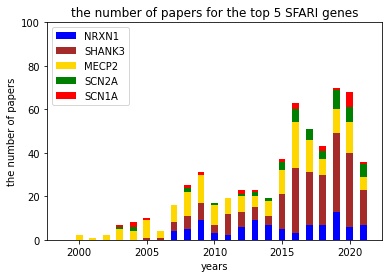

In [9]:
#Part One Task 5 - Plot a single stacked histogram displaying the data from the table.
df= pd.DataFrame(plot)
y1=df.iloc[0]
y2=df.iloc[1]
y3=df.iloc[2]
y4=df.iloc[3]
y5=df.iloc[4]
x_data=[]
for i in range(1999,2022,1):
    x_data.append(i)
plt.bar(x=x_data, height=y1, label='NRXN1', color='blue', width=0.5)
plt.bar(x=x_data, height=y2, label='SHANK3', color='brown', width=0.5,bottom=np.array(y1))
plt.bar(x=x_data, height=y3, label='MECP2', color='gold', width=0.5,bottom=(np.array(y1)+np.array(y2)))
plt.bar(x=x_data, height=y4, label='SCN2A', color='green', width=0.5,bottom=(np.array(y1)+np.array(y2)+np.array(y3)))
plt.bar(x=x_data, height=y5, label='SCN1A', color='red', width=0.5,bottom=(np.array(y1)+np.array(y2)+np.array(y3)+np.array(y4)))
plt.title('the number of papers for the top 5 SFARI genes')
plt.ylabel('the number of papers')
plt.xlabel('years')
plt.ylim(0,100)
plt.legend(loc='upper left')
pylab.rcParams['figure.figsize'] = (15.0, 8.0)
plt.show()

In [10]:
#Part One Extensive analysis
#find the SFARI which gene-score category is 2
SFARI_gene_score_category_2=SFARI[SFARI['gene-score']== 2.0]
#rank the genes by ‘number-of-reports’
SFARI_gene_score_category_2_sorted = SFARI_gene_score_category_2.sort_values(by='number-of-reports', ascending=False)
#list the top 5 gene-symbol
top_5_gene_symbol_new=SFARI_gene_score_category_2_sorted['gene-symbol'][0:5]
# note the egquery function provides Entrez database counts from a global search.
for i in top_5_gene_symbol_new:
    handle = Entrez.egquery(term='"Autism Spectrum Disorder"'+'[MH]'+ i )
    record = Entrez.read(handle)
    handle.close()
    # we can iterate through the record and only return the 'nucleotide' result
    for row in record["eGQueryResult"]:
        if row["DbName"]=="pubmed":
            print("gene-symbol:" + i +'\n'+ row["Count"]+' papers\n ' )

gene-symbol:CNTNAP2
102 papers
 
gene-symbol:OXTR
78 papers
 
gene-symbol:GRIN2A
7 papers
 
gene-symbol:MET
748 papers
 
gene-symbol:RBFOX1
14 papers
 


In [ ]:
#find the SFARI which gene-score category is 3
SFARI_gene_score_category_3=SFARI[SFARI['gene-score']== 3.0]
#rank the genes by ‘number-of-reports’
SFARI_gene_score_category_3_sorted = SFARI_gene_score_category_3.sort_values(by='number-of-reports', ascending=False)
#list the top 5 gene-symbol
top_5_gene_symbol_n=SFARI_gene_score_category_3_sorted['gene-symbol'][0:5]
# note the egquery function provides Entrez database counts from a global search.
for i in top_5_gene_symbol_n:
    handle = Entrez.egquery(term='"Autism Spectrum Disorder"'+'[MH]'+ i )
    record = Entrez.read(handle)
    handle.close()
    # we can iterate through the record and only return the 'nucleotide' result
    for row in record["eGQueryResult"]:
        if row["DbName"]=="pubmed":
            print("gene-symbol:" + i +'\n'+ row["Count"]+' papers\n ' )

gene-symbol:SATB2
5 papers
 
gene-symbol:SLC6A4
84 papers
 
gene-symbol:DPP6
4 papers
 
gene-symbol:IL1RAPL1
9 papers
 
gene-symbol:SLC25A12
16 papers
 


In [ ]:
#search all SFARI gene result in PubMed
#rank the genes by ‘number-of-reports’
SFARI = SFARI.sort_values(by='number-of-reports', ascending=False)
#list the top 5 gene-symbol
top_5_gene_symbol_ne=SFARI['gene-symbol'][0:5]
# note the egquery function provides Entrez database counts from a global search.
for i in top_5_gene_symbol_ne:
    handle = Entrez.egquery(term='"Autism Spectrum Disorder"'+'[MH]'+ i )
    record = Entrez.read(handle)
    handle.close()
    # we can iterate through the record and only return the 'nucleotide' result
    for row in record["eGQueryResult"]:
        if row["DbName"]=="pubmed":
            print("gene-symbol:" + i +'\n'+ row["Count"]+' papers\n ' )

gene-symbol:NRXN1
75 papers
 
gene-symbol:SHANK3
194 papers
 
gene-symbol:MECP2
147 papers
 
gene-symbol:SCN2A
44 papers
 
gene-symbol:CNTNAP2
102 papers
 


In [ ]:
#Part Two Task 1 – Map the gene-symbol for every gene in the SFARI gene list to an NCBI UID (unique Entrez Gene identifier) 
#download the Homo sapiens gene info from 'https://ftp.ncbi.nih.gov/gene/DATA/GENE_INFO/Mammalia/Homo_sapiens.gene_info.gz'
ul.request.urlretrieve('https://ftp.ncbi.nih.gov/gene/DATA/GENE_INFO/Mammalia/Homo_sapiens.gene_info.gz','Homo_sapiens.gene_info')
#read the Homo sapiens gene info files into Pandas data frames and unzip it
Homo_sapiens_gene_info = pd.read_csv('Homo_sapiens.gene_info.gz', compression='gzip', header=0, sep='\t')
#get "GeneID" and "Symbol" column from Homo sapiens gene info and drop duplication item in "Symbol" column.
Homo_sapiens_gene_info=Homo_sapiens_gene_info[["GeneID","Symbol"]].drop_duplicates('Symbol')
#merge SFARI gene list and Homo sapiens gene info into a table
SFARI_gene_ID = pd.merge(SFARI,Homo_sapiens_gene_info,right_on='Symbol',left_on='gene-symbol')
#show the result
SFARI_gene_ID

,status,gene-symbol,gene-name,ensembl-id,chromosome,genetic-category,gene-score,syndromic,number-of-reports,GeneID,Symbol
0,9,ABAT,4-aminobutyrate aminotransferase,ENSG00000183044,16,"Rare Single Gene Mutation, Genetic Association",3.0,0,5,18,ABAT
1,9,ABCA10,"ATP-binding cassette, sub-family A (ABC1), mem...",ENSG00000154263,17,Rare Single Gene Mutation,3.0,0,1,10349,ABCA10
2,9,ABCA13,ATP binding cassette subfamily A member 13,ENSG00000179869,7,"Rare Single Gene Mutation, Functional",3.0,0,6,154664,ABCA13
3,9,ABCA7,"ATP-binding cassette, sub-family A (ABC1), mem...",ENSG00000064687,19,Rare Single Gene Mutation,3.0,0,4,10347,ABCA7
4,9,ACE,angiotensin I converting enzyme,ENSG00000159640,17,"Rare Single Gene Mutation, Genetic Association",3.0,0,3,1636,ACE
...,...,...,...,...,...,...,...,...,...,...,...
1012,9,ZMYM2,zinc finger MYM-type containing 2,ENSG00000121741,13,"Rare Single Gene Mutation, Syndromic",2.0,1,6,7750,ZMYM2
1013,9,ZMYND8,zinc finger MYND-type containing 8,ENSG00000101040,20,Rare Single Gene Mutation,1.0,0,4,23613,ZMYND8
1014,9,ZNF827,Zinc finger protein 827,ENSG00000151612,4,Genetic Association,3.0,0,1,152485,ZNF827
1015,9,ZSWIM6,zinc finger SWIM-type containing 6,ENSG00000130449,5,"Syndromic, Genetic Association",NaN,1,3,57688,ZSWIM6


In [ ]:
#show the Gene symbol which not show in 'Homo_sapiens.gene_info'
print(set(list(SFARI_gene_ID["Symbol"]))^set(list(SFARI["gene-symbol"])))

{'MSNP1AS', 'TTC25', 'RP11-1407O15.2', 'NOTCH2NL', 'PHB', 'RPS10P2-AS1'}


In [ ]:
#'NOTCH2NL'=100996717,'TTC25'=100857899, 'RPS10P2-AS1', 'PHB'=818036, 'RP11-1407O15.2', 'MSNP1AS=4479'

In [ ]:
#Part Two Task 2 – Using the gene2go file from NCBI that we worked with in week 8 find the Gene Ontology terms that have been annotated to all of the SFARI genes.
#download the gene2go from 'https://ftp.ncbi.nlm.nih.gov/gene/DATA/gene2go.gz'
ul.request.urlretrieve('https://ftp.ncbi.nlm.nih.gov/gene/DATA/gene2go.gz','gene2go.gz')
#read the gene2go files into Pandas data frames and unzip it
gene2go = pd.read_csv('gene2go.gz', compression='gzip', header=0, sep='\t')
#explicitly restrict to human (tax_id - 9606)
human_gene2go = gene2go[gene2go['#tax_id']==9606]
#merge the dataframes on the geneid
gene2go_gene_id = pd.merge(SFARI_gene_ID,human_gene2go,right_on='GeneID',left_on='GeneID').drop_duplicates()
gene2go_gene_id

,status,gene-symbol,gene-name,ensembl-id,chromosome,genetic-category,gene-score,syndromic,number-of-reports,GeneID,Symbol,#tax_id,GO_ID,Evidence,Qualifier,GO_term,PubMed,Category
0,9,ABAT,4-aminobutyrate aminotransferase,ENSG00000183044,16,"Rare Single Gene Mutation, Genetic Association",3.0,0,5,18,ABAT,9606,GO:0001666,IEA,involved_in,response to hypoxia,-,Process
1,9,ABAT,4-aminobutyrate aminotransferase,ENSG00000183044,16,"Rare Single Gene Mutation, Genetic Association",3.0,0,5,18,ABAT,9606,GO:0003867,IDA,contributes_to,4-aminobutyrate transaminase activity,15528998,Function
2,9,ABAT,4-aminobutyrate aminotransferase,ENSG00000183044,16,"Rare Single Gene Mutation, Genetic Association",3.0,0,5,18,ABAT,9606,GO:0005739,IBA,is_active_in,mitochondrion,21873635,Component
3,9,ABAT,4-aminobutyrate aminotransferase,ENSG00000183044,16,"Rare Single Gene Mutation, Genetic Association",3.0,0,5,18,ABAT,9606,GO:0005739,IDA,located_in,mitochondrion,-,Component
4,9,ABAT,4-aminobutyrate aminotransferase,ENSG00000183044,16,"Rare Single Gene Mutation, Genetic Association",3.0,0,5,18,ABAT,9606,GO:0005739,ISS,located_in,mitochondrion,-,Component
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27562,9,ZWILCH,zwilchkinetochore protein,ENSG00000174442,15,Rare Single Gene Mutation,3.0,0,4,55055,ZWILCH,9606,GO:0034501,IMP,involved_in,protein localization to kinetochore,15824131,Process
27563,9,ZWILCH,zwilchkinetochore protein,ENSG00000174442,15,Rare Single Gene Mutation,3.0,0,4,55055,ZWILCH,9606,GO:0051301,IEA,involved_in,cell division,-,Process
27564,9,ZWILCH,zwilchkinetochore protein,ENSG00000174442,15,Rare Single Gene Mutation,3.0,0,4,55055,ZWILCH,9606,GO:1990423,IBA,part_of,RZZ complex,21873635,Component
27565,9,ZWILCH,zwilchkinetochore protein,ENSG00000174442,15,Rare Single Gene Mutation,3.0,0,4,55055,ZWILCH,9606,GO:1990423,IDA,part_of,RZZ complex,20462495,Component


In [ ]:
#show the GeneID which not show in 'gene2go.gz'
print(set(list(SFARI_gene_ID["gene-symbol"]))^set(list(gene2go_gene_id["Symbol"])))

{'FAM47A', 'CCSER1', 'METTL26', 'PTCHD1-AS', 'MSANTD2', 'MEMO1'}


In [ ]:
#'FAM47A=158724','PTCHD1-AS=100873065','CCSER1=401145','MSANTD2=79684','METTL26=84326','MEMO1=76890'

In [ ]:
#Part Two Task 3 – Now split the genes up into three lists by their SFARI gene-score
gene_score1=gene2go_gene_id[gene2go_gene_id["gene-score"]==1.0]
gene_score2=gene2go_gene_id[gene2go_gene_id["gene-score"]==2.0]
gene_score3=gene2go_gene_id[gene2go_gene_id["gene-score"]==3.0]
gene_score1

,status,gene-symbol,gene-name,ensembl-id,chromosome,genetic-category,gene-score,syndromic,number-of-reports,GeneID,Symbol,#tax_id,GO_ID,Evidence,Qualifier,GO_term,PubMed,Category
265,9,ACTB,actin beta,ENSG00000075624,7,"Rare Single Gene Mutation, Syndromic",1.0,1,5,60,ACTB,9606,GO:0000079,ISS,involved_in,regulation of cyclin-dependent protein serine/...,-,Process
266,9,ACTB,actin beta,ENSG00000075624,7,"Rare Single Gene Mutation, Syndromic",1.0,1,5,60,ACTB,9606,GO:0000785,HDA,located_in,chromatin,16217013,Component
267,9,ACTB,actin beta,ENSG00000075624,7,"Rare Single Gene Mutation, Syndromic",1.0,1,5,60,ACTB,9606,GO:0000786,IDA,part_of,nucleosome,27153538,Component
268,9,ACTB,actin beta,ENSG00000075624,7,"Rare Single Gene Mutation, Syndromic",1.0,1,5,60,ACTB,9606,GO:0001738,IMP,involved_in,morphogenesis of a polarized epithelium,22855531,Process
269,9,ACTB,actin beta,ENSG00000075624,7,"Rare Single Gene Mutation, Syndromic",1.0,1,5,60,ACTB,9606,GO:0001895,HEP,involved_in,retina homeostasis,23580065,Process
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27533,9,ZMYND8,zinc finger MYND-type containing 8,ENSG00000101040,20,Rare Single Gene Mutation,1.0,0,4,23613,ZMYND8,9606,GO:0030336,IMP,involved_in,negative regulation of cell migration,27477906,Process
27534,9,ZMYND8,zinc finger MYND-type containing 8,ENSG00000101040,20,Rare Single Gene Mutation,1.0,0,4,23613,ZMYND8,9606,GO:0035064,IDA,enables,methylated histone binding,27477906,Function
27535,9,ZMYND8,zinc finger MYND-type containing 8,ENSG00000101040,20,Rare Single Gene Mutation,1.0,0,4,23613,ZMYND8,9606,GO:0045892,IEA,involved_in,"negative regulation of transcription, DNA-temp...",-,Process
27536,9,ZMYND8,zinc finger MYND-type containing 8,ENSG00000101040,20,Rare Single Gene Mutation,1.0,0,4,23613,ZMYND8,9606,GO:0070577,IDA,enables,lysine-acetylated histone binding,27477906,Function


In [ ]:
gene_score2

,status,gene-symbol,gene-name,ensembl-id,chromosome,genetic-category,gene-score,syndromic,number-of-reports,GeneID,Symbol,#tax_id,GO_ID,Evidence,Qualifier,GO_term,PubMed,Category
220,9,ACHE,Acetylcholinesterase (Yt blood group),ENSG00000087085,7,Rare Single Gene Mutation,2.0,0,5,43,ACHE,9606,GO:0001507,NAS,involved_in,acetylcholine catabolic process in synaptic cleft,1517212,Process
221,9,ACHE,Acetylcholinesterase (Yt blood group),ENSG00000087085,7,Rare Single Gene Mutation,2.0,0,5,43,ACHE,9606,GO:0001540,TAS,enables,amyloid-beta binding,11283752,Function
222,9,ACHE,Acetylcholinesterase (Yt blood group),ENSG00000087085,7,Rare Single Gene Mutation,2.0,0,5,43,ACHE,9606,GO:0001919,IEA,involved_in,regulation of receptor recycling,-,Process
223,9,ACHE,Acetylcholinesterase (Yt blood group),ENSG00000087085,7,Rare Single Gene Mutation,2.0,0,5,43,ACHE,9606,GO:0002076,IEP,involved_in,osteoblast development,15454088,Process
224,9,ACHE,Acetylcholinesterase (Yt blood group),ENSG00000087085,7,Rare Single Gene Mutation,2.0,0,5,43,ACHE,9606,GO:0003990,IBA,enables,acetylcholinesterase activity,21873635,Function
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27518,9,ZMYM2,zinc finger MYM-type containing 2,ENSG00000121741,13,"Rare Single Gene Mutation, Syndromic",2.0,1,6,7750,ZMYM2,9606,GO:0005829,TAS,located_in,cytosol,-,Component
27519,9,ZMYM2,zinc finger MYM-type containing 2,ENSG00000121741,13,"Rare Single Gene Mutation, Syndromic",2.0,1,6,7750,ZMYM2,9606,GO:0008150,ND,involved_in,biological_process,-,Process
27520,9,ZMYM2,zinc finger MYM-type containing 2,ENSG00000121741,13,"Rare Single Gene Mutation, Syndromic",2.0,1,6,7750,ZMYM2,9606,GO:0008270,NAS,enables,zinc ion binding,9576949,Function
27521,9,ZMYM2,zinc finger MYM-type containing 2,ENSG00000121741,13,"Rare Single Gene Mutation, Syndromic",2.0,1,6,7750,ZMYM2,9606,GO:0016605,IDA,located_in,PML body,17027752,Component


In [ ]:
gene_score3

,status,gene-symbol,gene-name,ensembl-id,chromosome,genetic-category,gene-score,syndromic,number-of-reports,GeneID,Symbol,#tax_id,GO_ID,Evidence,Qualifier,GO_term,PubMed,Category
0,9,ABAT,4-aminobutyrate aminotransferase,ENSG00000183044,16,"Rare Single Gene Mutation, Genetic Association",3.0,0,5,18,ABAT,9606,GO:0001666,IEA,involved_in,response to hypoxia,-,Process
1,9,ABAT,4-aminobutyrate aminotransferase,ENSG00000183044,16,"Rare Single Gene Mutation, Genetic Association",3.0,0,5,18,ABAT,9606,GO:0003867,IDA,contributes_to,4-aminobutyrate transaminase activity,15528998,Function
2,9,ABAT,4-aminobutyrate aminotransferase,ENSG00000183044,16,"Rare Single Gene Mutation, Genetic Association",3.0,0,5,18,ABAT,9606,GO:0005739,IBA,is_active_in,mitochondrion,21873635,Component
3,9,ABAT,4-aminobutyrate aminotransferase,ENSG00000183044,16,"Rare Single Gene Mutation, Genetic Association",3.0,0,5,18,ABAT,9606,GO:0005739,IDA,located_in,mitochondrion,-,Component
4,9,ABAT,4-aminobutyrate aminotransferase,ENSG00000183044,16,"Rare Single Gene Mutation, Genetic Association",3.0,0,5,18,ABAT,9606,GO:0005739,ISS,located_in,mitochondrion,-,Component
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27562,9,ZWILCH,zwilchkinetochore protein,ENSG00000174442,15,Rare Single Gene Mutation,3.0,0,4,55055,ZWILCH,9606,GO:0034501,IMP,involved_in,protein localization to kinetochore,15824131,Process
27563,9,ZWILCH,zwilchkinetochore protein,ENSG00000174442,15,Rare Single Gene Mutation,3.0,0,4,55055,ZWILCH,9606,GO:0051301,IEA,involved_in,cell division,-,Process
27564,9,ZWILCH,zwilchkinetochore protein,ENSG00000174442,15,Rare Single Gene Mutation,3.0,0,4,55055,ZWILCH,9606,GO:1990423,IBA,part_of,RZZ complex,21873635,Component
27565,9,ZWILCH,zwilchkinetochore protein,ENSG00000174442,15,Rare Single Gene Mutation,3.0,0,4,55055,ZWILCH,9606,GO:1990423,IDA,part_of,RZZ complex,20462495,Component


In [ ]:
#Part Two Task 4 – Create tables of the 10 most commonly annotated terms for each gene list. The tables should have the following columns: GO term ID, GO term Description, GO term count
def top10(gene_score):
    #make a table which is groupby GO term and sort by GO count which show the top 10
    top=pd.DataFrame(gene_score.groupby('GO_term').size().sort_values(ascending=False)[0:10])
    #get the "GO_ID","GO_term","Category" three column and drop duplication
    unique_score_top =gene_score[["GO_ID","GO_term","Category"]].drop_duplicates()
    #merge the two tables 
    gene_score_top10 = pd.merge(unique_score_top,top,right_on="GO_term",left_on="GO_term")
    #change the columns names 
    gene_score_top10.columns=["GO_term_ID","GO_term_Description","Category","GO_term_count"]
    #sort by GO term count
    gene_score_top10=gene_score_top10.sort_values(by="GO_term_count",ascending=False)
    print(gene_score_top10)

In [ ]:
top10(gene_score1)

   GO_term_ID                                GO_term_Description   Category  \
0  GO:0005515                                    protein binding   Function   
1  GO:0005634                                            nucleus  Component   
2  GO:0005654                                        nucleoplasm  Component   
4  GO:0005829                                            cytosol  Component   
5  GO:0005886                                    plasma membrane  Component   
3  GO:0005737                                          cytoplasm  Component   
9  GO:0045944  positive regulation of transcription by RNA po...    Process   
6  GO:0000981  DNA-binding transcription factor activity, RNA...   Function   
8  GO:0000122  negative regulation of transcription by RNA po...    Process   
7  GO:0006357   regulation of transcription by RNA polymerase II    Process   

   GO_term_count  
0            161  
1            157  
2            133  
4             99  
5             95  
3             75

In [ ]:
#statistical analysis directly on the results from Task 4
gene_list_1=gene_score1[gene_score1["GO_ID"]=='GO:0005515']['GeneID'].drop_duplicates()
gene_list_1.to_csv('top_GOID_gene_score_1.csv',index=False)

In [ ]:
#how many human genes are there in our human gene2GO set?
num_human_genes_ingo = len(human_gene2go['GeneID'].drop_duplicates())

#how many genes are annotated with GO:0005515 in our human gene2GO set?
num_human_genes_withtop = len(human_gene2go[human_gene2go['GO_ID'] == 'GO:0005515']['GeneID'].drop_duplicates())

#what is the size of our gene list?
num_human_genes_inlist = len(SFARI_gene_ID['GeneID'].drop_duplicates())

#how many genes would we expect to be annoated with the top GO_ID?
expectation = num_human_genes_withtop/num_human_genes_ingo * num_human_genes_inlist

print('We would expect to see this '+str(round(num_human_genes_withtop/num_human_genes_ingo * num_human_genes_inlist,2))+' times')

#how many genes in our list are annotated with the top GO_ID? 
observation = len(gene2go_gene_id[gene2go_gene_id['GO_ID'] == 'GO:0005515']['GeneID'].drop_duplicates())
print('We actually see this '+str(round(observation,2))+' times')

#what's the enrichment?
print('So, the top GO term is found '+str(round(observation/expectation,2))+' times more frequently than we would expect by chance')

We would expect to see this 614.96 times
We actually see this 711 times
So, the top GO term is found 1.16 times more frequently than we would expect by chance


In [ ]:
top10(gene_score2)

   GO_term_ID                    GO_term_Description   Category  GO_term_count
0  GO:0005515                        protein binding   Function            149
2  GO:0005886                        plasma membrane  Component            130
1  GO:0005634                                nucleus  Component            118
4  GO:0005829                                cytosol  Component            109
7  GO:0005654                            nucleoplasm  Component             92
5  GO:0005737                              cytoplasm  Component             87
9  GO:0003723                            RNA binding   Function             42
3  GO:0016020                               membrane  Component             39
6  GO:0005887  integral component of plasma membrane  Component             34
8  GO:0070062                  extracellular exosome  Component             33


In [ ]:
#statistical analysis directly on the results from Task 4
gene_list_2=gene_score2[gene_score2["GO_ID"]=='GO:0005515']['GeneID'].drop_duplicates()
gene_list_2.to_csv('top_GOID_gene_score_2.csv',index=False)

In [ ]:
top10(gene_score3)

   GO_term_ID                    GO_term_Description   Category  GO_term_count
3  GO:0005515                        protein binding   Function            340
2  GO:0005886                        plasma membrane  Component            264
6  GO:0005829                                cytosol  Component            219
4  GO:0005634                                nucleus  Component            189
5  GO:0005737                              cytoplasm  Component            164
8  GO:0005654                            nucleoplasm  Component            152
7  GO:0005887  integral component of plasma membrane  Component             96
1  GO:0016021         integral component of membrane  Component             88
9  GO:0016020                               membrane  Component             74
0  GO:0046872                      metal ion binding   Function             68


In [ ]:
#statistical analysis directly on the results from Task 4
gene_list_3=gene_score3[gene_score3["GO_ID"]=='GO:0005515']['GeneID'].drop_duplicates()
gene_list_3.to_csv('top_GOID_gene_score_3.csv',index=False)

In [ ]:
#Part Two Task 5 – Take the three lists of UIDs created above and use the PantherDB tool - http://pantherdb.org/ to perform a “Functional classification viewed in graphic charts” analysis reporting and select the “Bar chart” display option, using default settings. Once on the results page displaying the bar chart use the pull-down menu to change the ontology to “Biological Process”. Click the small (!) “export” button to download the results as a text file and us this to make your own bar chart
# prepare the csv files for task5 to use the UID by the PantherDB tool
ID=gene_score1.drop_duplicates("GeneID")
score=pd.DataFrame(ID["GeneID"])
score.to_csv('gene_score1.csv',index=False)

In [ ]:
ID=gene_score2.drop_duplicates("GeneID")
score=pd.DataFrame(ID["GeneID"])
score.to_csv('gene_score2.csv',index=False)

In [ ]:
ID=gene_score3.drop_duplicates("GeneID")
score=pd.DataFrame(ID["GeneID"])
score.to_csv('gene_score3.csv',index=False)

In [ ]:
# define a function to creat a bar chart 
# scoreChart.txt--this files is download form the PantherDB tool website
def bar(chart):
    df = pd.read_table(chart,header=None)
    bar_data = df.iloc[:,1:3]
    bar_data=bar_data.sort_values(by=[1])
    for i in range(bar_data.shape[0]):
        plt.bar(bar_data.iloc[i,0], bar_data.iloc[i,1], label = bar_data.iloc[i,0])
    plt.legend(loc='upper right', bbox_to_anchor=(1.60, 1.00))
    plt.xticks([])
    plt.ylabel('Genes')
    plt.xlabel('Category')
    plt.show()

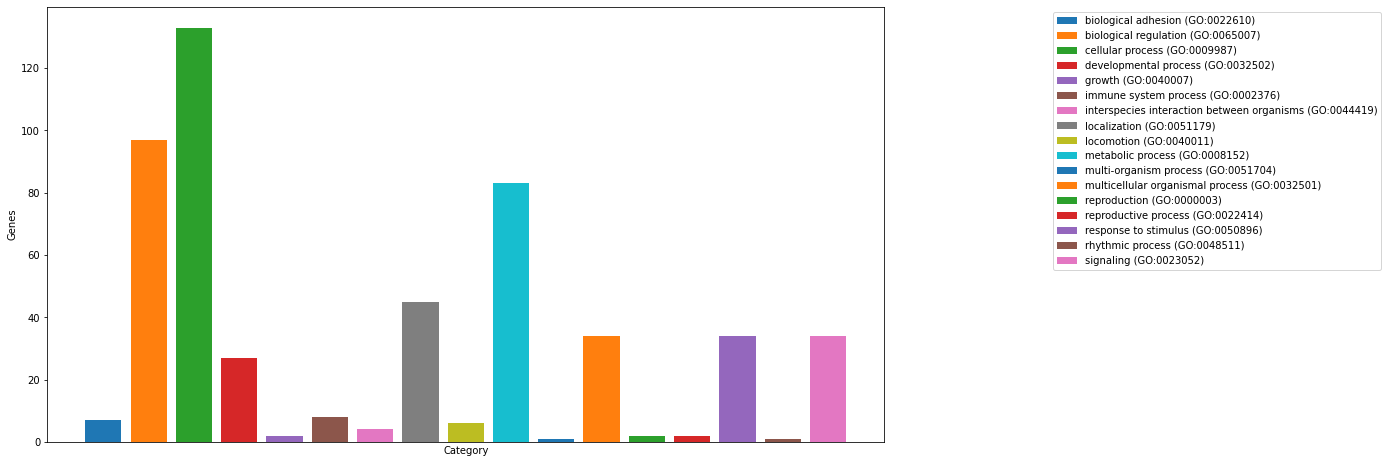

In [ ]:
bar("pantherChart1.txt")

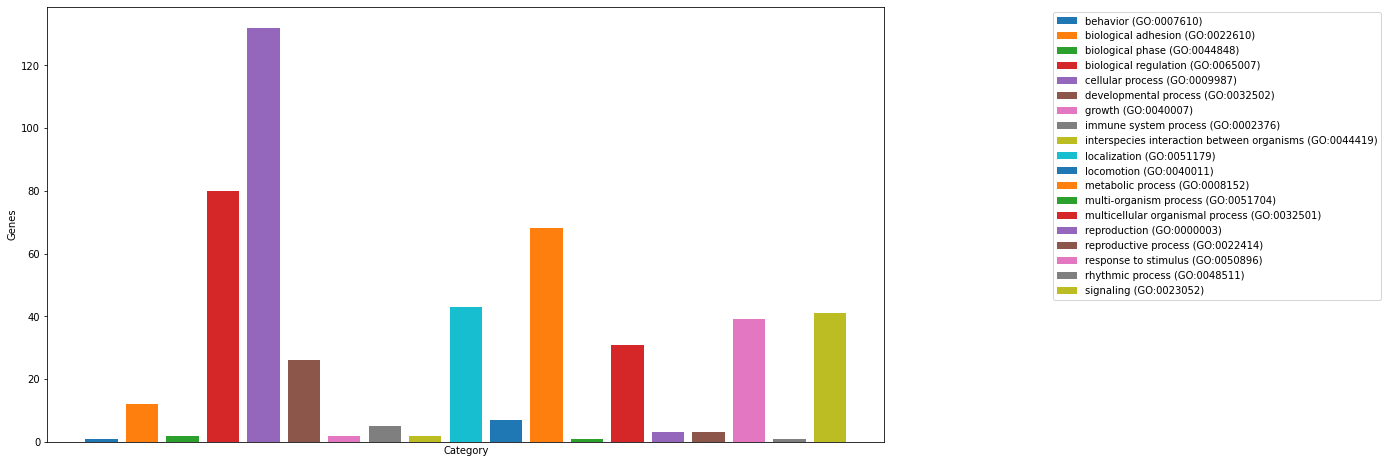

In [ ]:
bar("pantherChart2.txt")

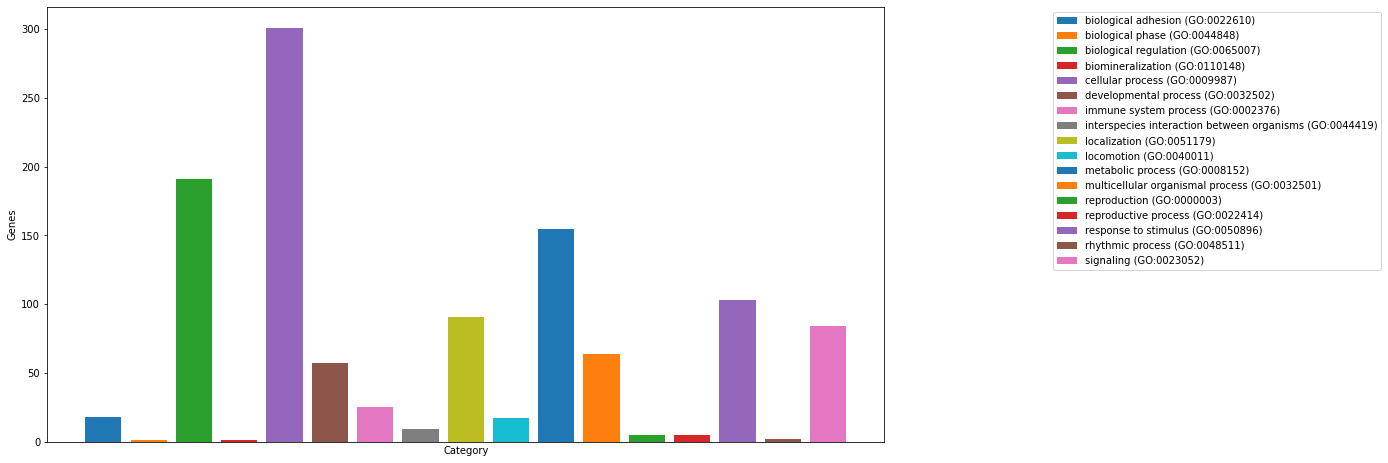

In [ ]:
bar("pantherChart3.txt")

In [ ]:
#Part Three Task 1
# prepare the txt files 
SFARI_score_1 =SFARI_gene_ID[SFARI_gene_ID["gene-score"]==1.0]
SFARI_score_2 =SFARI_score_1["GeneID"]  
SFARI_score_2.to_csv('SFARI_score_1.txt',index=False)

In [ ]:
#Part Three Task 2
df =pd.read_table("string_MCL_clusters.tsv")
df.head()

,#clustering method,cluster number,cluster color,gene count,protein name,protein identifier,protein description
0,MCL,1,Red,33,ADSL,9606.ENSP00000485525,Adenylosuccinate lyase; Catalyzes two non-sequ...
1,MCL,1,Red,33,ARX,9606.ENSP00000368332,Homeobox protein ARX; Transcription factor req...
2,MCL,1,Red,33,CASK,9606.ENSP00000367408,Peripheral plasma membrane protein CASK; Multi...
3,MCL,1,Red,33,DLG4,9606.ENSP00000382428,Disks large homolog 4; Interacts with the cyto...
4,MCL,1,Red,33,DPYSL2,9606.ENSP00000309539,Dihydropyrimidinase-related protein 2; Plays a...


In [ ]:
df["cluster number"].value_counts()

1     33
2     24
3     14
4     12
5     10
6      7
7      6
10     5
9      5
8      5
11     4
12     4
18     3
23     3
21     3
20     3
19     3
22     3
17     3
16     3
15     3
14     3
13     3
38     2
37     2
36     2
35     2
34     2
33     2
32     2
31     2
30     2
29     2
28     2
27     2
26     2
25     2
24     2
39     1
40     1
41     1
42     1
43     1
Name: cluster number, dtype: int64

In [ ]:
# get the biggest clusters
df=df.iloc[0:32]
protein_1=df["protein name"]
protein_1= pd.DataFrame(protein_1)
protein_1.columns=["Symbol"]
# merge the two tables and get the GeneID to store in the file
MCL_1=pd.merge(SFARI_gene_ID,protein_1,how='inner',on='Symbol')
MCL1_gene_score1=MCL_1["GeneID"]
MCL1_gene_score1.to_csv("MCL1_gene_score1.csv",index=False)

In [ ]:
df =pd.read_table("string_MCL_clusters.tsv")
df["cluster number"].value_counts()
# get the second biggest clusters
df=df.iloc[32:32+24]
protein_2=df["protein name"]
protein_2= pd.DataFrame(protein_2)
protein_2.columns=["Symbol"]
# merge the two tables and get the GeneID to store in the file
MCL_2=pd.merge(SFARI_gene_ID,protein_2,how='inner',on='Symbol')
MCL2_gene_score1=MCL_2["GeneID"]
MCL2_gene_score1.to_csv("MCL2_gene_score1.csv",index=False)

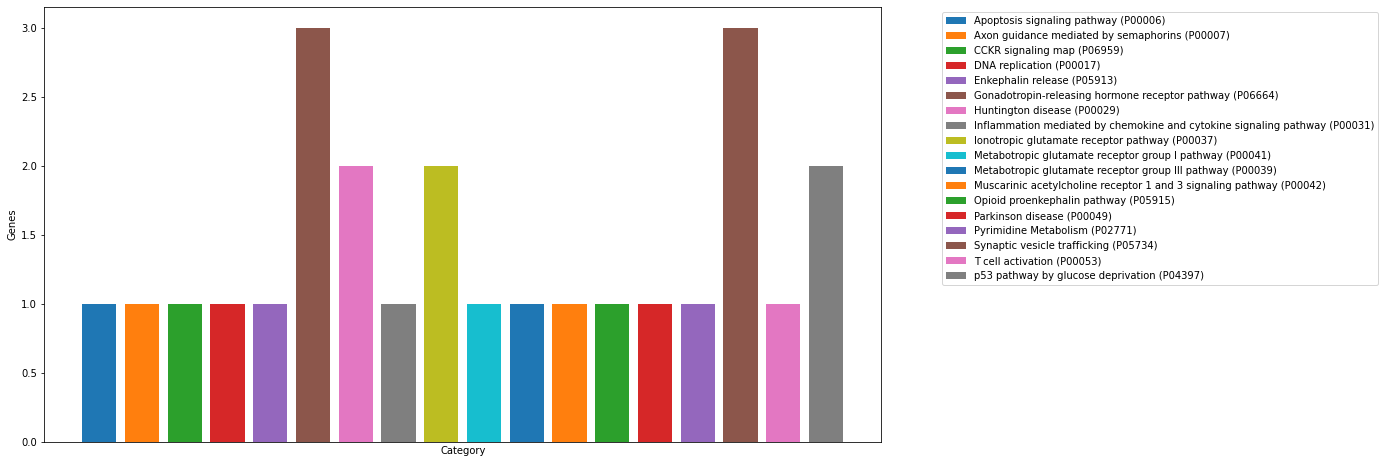

In [ ]:
bar("pantherChart MCL1_gene_score1.txt")

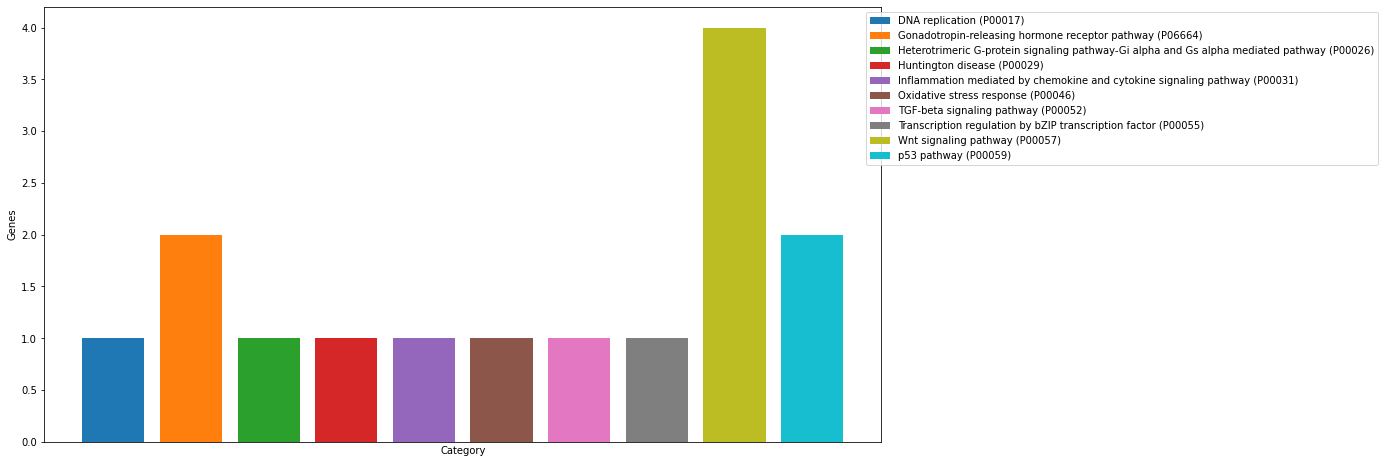

In [ ]:
bar("pantherChart MCL2_gene_score1.txt")

In [ ]:
#Extensive analysis
# prepare the txt files 
SFARI_score_3 =SFARI_gene_ID[SFARI_gene_ID["gene-score"]==2.0]
SFARI_score_4 =SFARI_score_3["GeneID"]  
SFARI_score_4.to_csv('SFARI_score_2.txt',index=False)

In [ ]:
df =pd.read_table("string_MCL_clusters_2.tsv")
df["cluster number"].value_counts()

1     15
2      8
3      7
4      6
5      5
      ..
57     1
56     1
54     1
53     1
70     1
Name: cluster number, Length: 70, dtype: int64

In [ ]:
# get the biggest clusters
df=df.iloc[0:14]
protein_3=df["protein name"]
protein_3= pd.DataFrame(protein_3)
protein_3.columns=["Symbol"]
# merge the two tables and get the GeneID to store in the file
MCL_3=pd.merge(SFARI_gene_ID,protein_3,how='inner',on='Symbol')
MCL3_gene_score2=MCL_3["GeneID"]
MCL3_gene_score2.to_csv("MCL1_gene_score2.csv",index=False)

In [ ]:
df =pd.read_table("string_MCL_clusters_2.tsv")
df["cluster number"].value_counts()
# get the second biggest clusters
df=df.iloc[14:14+8]
protein_4=df["protein name"]
protein_4= pd.DataFrame(protein_4)
protein_4.columns=["Symbol"]
# merge the two tables and get the GeneID to store in the file
MCL_4=pd.merge(SFARI_gene_ID,protein_4,how='inner',on='Symbol')
MCL4_gene_score2=MCL_4["GeneID"]
MCL4_gene_score2.to_csv("MCL2_gene_score2.csv",index=False)

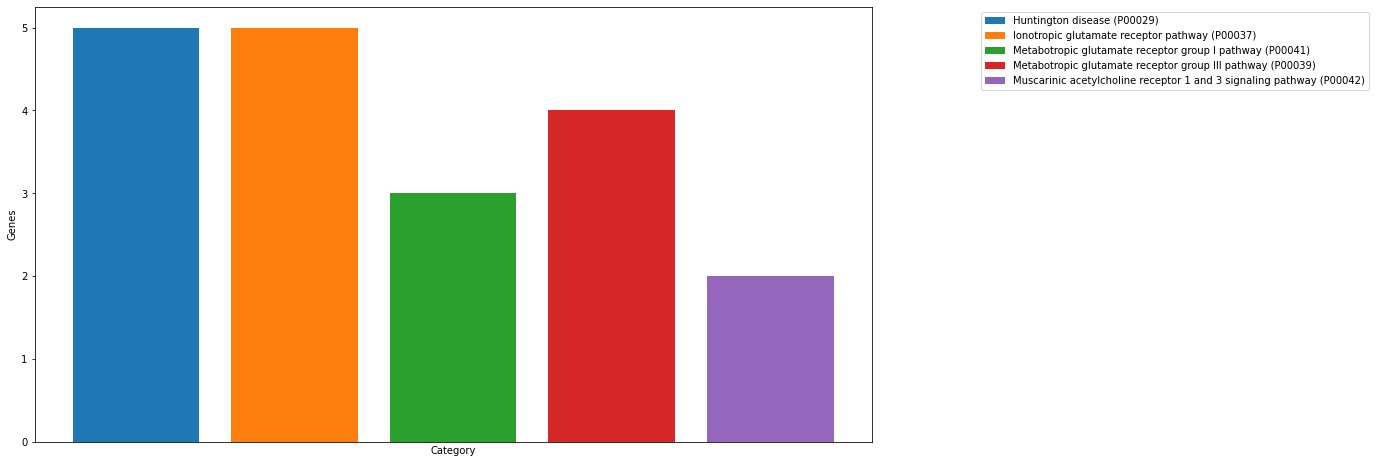

In [ ]:
bar("pantherChart_1.txt")